## Map of BPHC
![](bphc_map.jpg)

In [1]:
# Import all necessary libraries
from numpy import inf
from graphviz import Digraph

In [2]:
# Representing graph nodes as a dictionary
# Distances in km

bphc_map = {'A0':{'A1':0.0497,'A2':0.026},'A1':{'A0':0.0237,'A3':0.1004,'A4':0.2706},
            'A2':{'A0':0.026,'A3':0.021,'A5':0.4999},'A3':{'A1':0.1018,'A2':0.021,'A6':0.095},
            'A4':{'A1':0.2706,'A7':0.1806},'A5':{'A2':0.4999,'A8':0.0341},'A6':{'A3':0.095,'A9':0.0564,'A10':0.1807},
            'A7':{'A4':0.1806,'A11':0.1802},'A8':{'A5':0.0341,'A12':0.1727,'A13':0.0568},'A9':{'A6':0.0564},
            'A10':{'A6':0.1807,'A14':0.0135,'A15':0.0179},'A11':{'A7':0.1802,'A16':0.1485,'A17':0.2593},
            'A12':{'A8':0.1727,'A18':0.0199,'A19':0.0205},'A13':{'A8':0.0568,'A20':0.1715,'A21':0.0373},
            'A14':{'A10':0.0135,'A22':0.0364,'A44':0.2936},'A15':{'A10':0.0179,'A18':0.2621,'A22':0.0181},
            'A16':{'A11':0.1485},'A17':{'A11':0.2593,'A23':0.1401,'A24':0.0756},
            'A18':{'A12':0.0199,'A15':0.2621,'A25':0.0971},'A19':{'A12':0.0205,'A20':0.0426,'A26':0.0982},
            'A20':{'A13':0.1715,'A19':0.0426,'A27':0.0129},'A21':{'A13':0.0373,'A28':0.1767,'A29':0.0648},
            'A22':{'A14':0.0364,'A15':0.0181,'A30':0.072},'A23':{'A17':0.1401,'A31':0.1259,'A32':0.0833},
            'A24':{'A17':0.0756,'A32':0.1408,'A33':0.2301},'A25':{'A18':0.0971,'A34':0.0182,'A51':0.1167},
            'A26':{'A19':0.0982,'A34':0.0213,'A35':0.06},'A27':{'A20':0.0129,'A28':0.052,'A35':0.0926},
            'A28':{'A21':0.1767,'A27':0.052,'A36':0.0951,'A37':0.0571},'A29':{'A21':0.0648,'A37':0.1704},
            'A30':{'A22':0.072,'A38':0.0271,'A39':0.0144},'A31':{'A23':0.1259},
            'A32':{'A23':0.0833,'A24':0.1408,'A44':0.0794},'A33':{'A24':0.2301,'A40':0.0368,'A53':0.0752},
            'A34':{'A25':0.0182,'A26':0.0213,'A41':0.1708},'A35':{'A26':0.06,'A27':0.0926,'A36':0.0532},
            'A36':{'A28':0.0951,'A35':0.0532,'A42':0.0592},
            'A37':{'A28':0.0571,'A29':0.1704,'A42':0.102,'A43':0.0521},
            'A38':{'A30':0.0144,'A39':0.0245,'A44':0.1009},'A39':{'A30':0.0144,'A38':0.0245,'A45':0.1062},
            'A40':{'A33':0.0368,'A46':0.1356,'A54':0.0763},'A41':{'A34':0.1708,'A46':0.0794,'A47':0.0328},
            'A42':{'A36':0.0592,'A37':0.102,'A48':0.1716,'A49':0.0518},'A43':{'A37':0.0521,'A49':0.0979},
            'A44':{'A14':0.2936,'A32':0.0794,'A38':0.1009},'A45':{'A39':0.1062,'A50':0.0883,'A51':0.04},
            'A46':{'A40':0.1356,'A41':0.0794,'A52':0.4027},'A47':{'A41':0.0328},'A48':{'A42':0.1716},
            'A49':{'A42':0.0518,'A43':0.0979},'A50':{'A45':0.0883,'A51':0.0879,'A53':0.1294},
            'A51':{'A25':0.1167,'A45':0.04,'A50':0.0879},'A52':{'A46':0.4027},
            'A53':{'A33':0.0752,'A50':0.1294,'A54':0.0374},'A54':{'A40':0.0763,'A53':0.0374}}

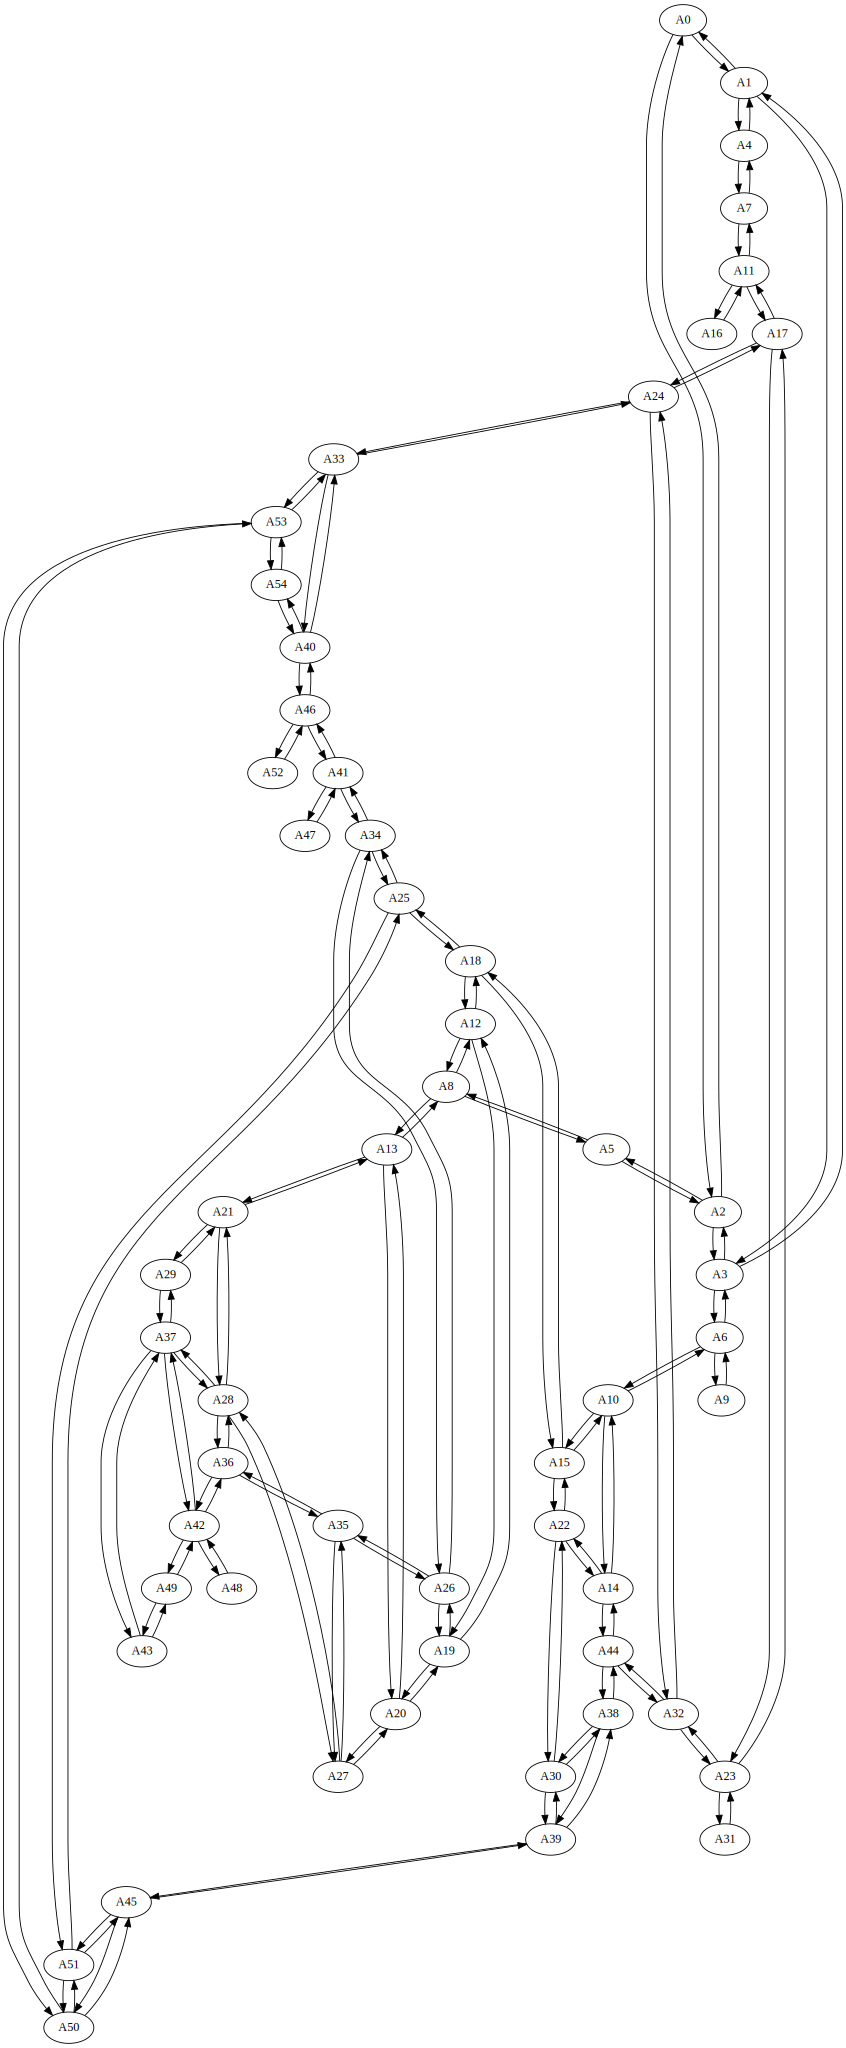

In [3]:
map_graph = Digraph()

for i in bphc_map.keys():
    map_graph.node(i)

for i in bphc_map.keys():
    for j in bphc_map[i].keys():
        map_graph.edge(i,j)

map_graph

In [4]:
# test case
graph = {'A': {'C': 5,'D': 1,'E': 2}, 'B': {'G': 3,'H': 1}, 'C': {'A':5,'D':3,'I':2},'D': {'A':1,'C':3,'H':2},
         'E': {'A':2,'F': 3}, 'F': {'E':3,'G':1}, 'G': {'B': 3,'F': 1,'H': 2}, 'H': {'B': 1,'D': 2,'G': 2,'I': 2},
         'I': {'C': 2, 'H': 2}}

In [5]:
# Dijkstra's algorithm

def dijkstras(start, end, graph):
    unset_nodes = list(graph.keys())
    unset_nodes.remove(start)
    
    lengths = dict()
    paths = dict()
    
    for i in graph.keys():
        if i in unset_nodes:
            if i in graph[start]:
                lengths[i] = graph[start][i]
                paths[i] = list((start,i))
            else:
                lengths[i] = inf
                paths[i] = list()
        else:
            lengths[i] = 0
            paths[i] = [i]
    
    while len(unset_nodes) != 0:
        nearest_nb = '-1'
        min_distance = inf
        for i in unset_nodes:
            if lengths[i] < min_distance:
                min_distance = lengths[i]
                nearest_nb = i
        
        for i in graph[nearest_nb].keys():
            if lengths[nearest_nb] + graph[nearest_nb][i] < lengths[i]:
                lengths[i] = lengths[nearest_nb] + graph[nearest_nb][i]
                paths[i] = list(paths[nearest_nb])
                paths[i].append(i)
        
        unset_nodes.remove(nearest_nb)
        
    print(paths[end])
    print('The shortest length = ',lengths[end])

dijkstras('A0','A51',bphc_map)

['A0', 'A2', 'A3', 'A6', 'A10', 'A15', 'A22', 'A30', 'A39', 'A45', 'A51']
The shortest length =  0.5913


In [6]:
# Distance using depth first search

def dfs_length(start, end, graph):
    status = dict()
    for i in graph.keys():
        status[i] = True
    status[start] = False
    
    stack_key = [start]
    stack_val = [0]
    
    distance = 0
    while stack_key[-1] != end:
        top = stack_key[-1]
        
        top_nbs = list(graph[top].keys())
        flag = True
        for i in top_nbs:
            if status[i]:
                stack_key.append(i)
                stack_val.append(graph[top][i])
                distance += graph[top][i]
                status[i] = False
                flag = False
                break
        if flag:
            stack_key.remove(top)
            distance -= stack_val[-1]
            stack_val.remove(stack_val[-1])
    
    return sum(stack_val)

print(dfs_length('A0','A52',bphc_map))

2.4776000000000002


In [ ]:
# A* algorithm

def a_star(start, end, graph):
    
    curr = start
    curr_path = [start]
    
    unset_path_hs = []
    unset_path_ns = []
    while curr != end:
        nbs = graph[curr].keys()
        
        for i in nbs:
            unset_path_hs.append(graph[curr][i] + dfs_length(i,end,graph))
            temp = curr_path
            temp.append(i)
            unset_path_ns.append(list(temp))
        
        req_index = unset_path_hs.index(min(unset_path_hs))
        curr_path = unset_path_ns[req_index]
        unset_path_ns.remove(unset_path_ns[req_index])
        unset_path_hs.remove(unset_path_hs[req_index])
        curr = curr_path[-1]
    
    print(curr_path)

a_star('A0','A52',bphc_map)